In [2]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.9 MB/s eta 0:00:00


In [66]:
from mtcnn import MTCNN
from mtcnn.utils.images import load_image
from mtcnn.utils.images import load_images_batch
from mtcnn.utils.plotting import plot
import matplotlib.pyplot as plt

## Basic Usage

In [6]:
image = load_image("batuhan.jpg")

In [7]:
mtcnn = MTCNN(device="CPU:0")

In [8]:
result = mtcnn.detect_faces(image)
result

[{'box': [180, 79, 204, 262],
  'confidence': np.float64(1.0),
  'keypoints': {'nose': [np.int64(278), np.int64(223)],
   'mouth_right': [np.int64(325), np.int64(266)],
   'right_eye': [np.int64(325), np.int64(175)],
   'left_eye': [np.int64(233), np.int64(174)],
   'mouth_left': [np.int64(231), np.int64(266)]}}]

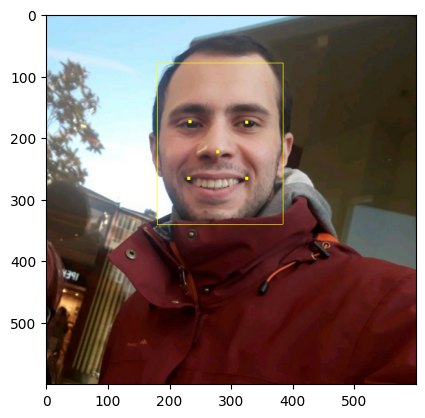

In [9]:
plt.imshow(plot(image, result))
plt.show()

## Batch Processing

In [10]:
image_paths = ["batch_data/sample1.jpg", "batch_data/sample2.jpg", "batch_data/sample3.jpg"]
images = load_images_batch(image_paths)

In [11]:
mtcnn = MTCNN(device="CPU:0")

In [12]:
results = mtcnn.detect_faces(images, batch_stack_justification="center")

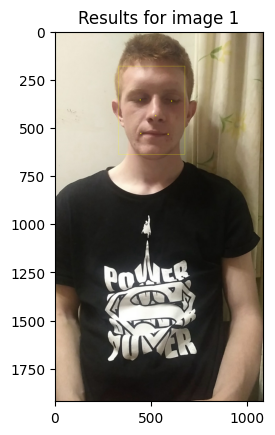

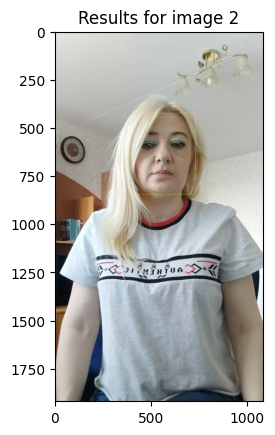

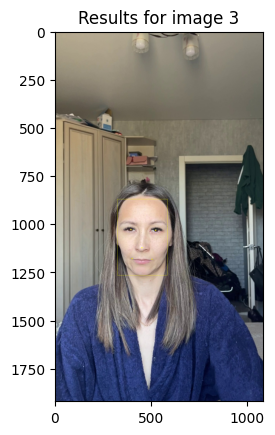

In [13]:
for i, image in enumerate(images):
    plt.figure()
    plt.imshow(plot(image, results[i]))
    plt.title(f"Results for image {i+1}")
    plt.show()

## Ablation Study

### PNet (Proposal Network)

* first stage of MTCNN
* processes inputs of variable size and generates bounding box proposals
* produces two outputs:
  * Regression of the bounding box coordinates within the convolutional receptive field.
  * Classification of the receptive field into two categories: no-face or face.



In [14]:
import sys
sys.path.insert(0, "..")

In [38]:
from mtcnn import MTCNN
from mtcnn.utils.images import load_image
from mtcnn.utils.tensorflow import set_gpu_memory_growth
from mtcnn.stages import StagePNet

In [16]:
# To avoid using excessive GPU memory (In case of using GPU)
set_gpu_memory_growth()

In [17]:
image = load_image("batuhan.jpg")

In [18]:
mtcnn = MTCNN(stages=[StagePNet], device="CPU:0")

In [19]:
%%time
result = mtcnn.detect_faces(image, postprocess=True)

CPU times: user 303 ms, sys: 9.8 ms, total: 312 ms
Wall time: 241 ms


In [20]:
result

[{'box': [171, 87, 234, 234], 'confidence': np.float64(0.9999999403953552)},
 {'box': [446, 363, 30, 30], 'confidence': np.float64(0.9999327063560486)},
 {'box': [175, 103, 184, 184], 'confidence': np.float64(0.9988857507705688)},
 {'box': [37, 439, 33, 33], 'confidence': np.float64(0.9969188570976257)},
 {'box': [445, 368, 19, 19], 'confidence': np.float64(0.9942713379859924)},
 {'box': [440, 356, 36, 36], 'confidence': np.float64(0.9921729564666748)},
 {'box': [150, 78, 337, 337], 'confidence': np.float64(0.991592288017273)},
 {'box': [61, 329, 29, 29], 'confidence': np.float64(0.9902631640434265)},
 {'box': [263, 248, 69, 69], 'confidence': np.float64(0.9817273616790771)},
 {'box': [154, 338, 20, 20], 'confidence': np.float64(0.9815099239349365)},
 {'box': [67, 195, 19, 19], 'confidence': np.float64(0.9760602116584778)},
 {'box': [27, 477, 30, 30], 'confidence': np.float64(0.9752403497695923)},
 {'box': [213, 207, 132, 132], 'confidence': np.float64(0.9743031859397888)},
 {'box': [2

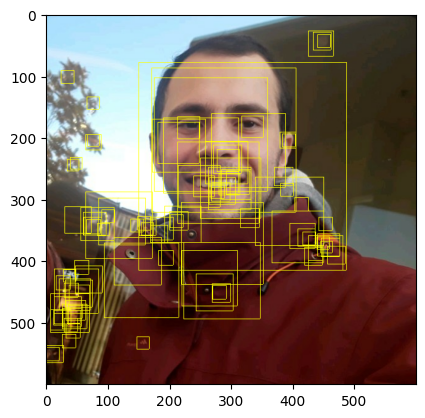

In [21]:
plt.imshow(plot(image, result))

In [24]:
stage = StagePNet()
model = stage.model

In [25]:
model.summary()

Model: "p_net_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, None, None, 10) │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu1 (PReLU)                  │ (None, None, None, 10) │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling1 (MaxPooling2D)      │ (None, None, None, 10) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, None, None, 16) │         1,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu2 (PReLU)                  │ (None, None, None, 16) │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, None, None, 32) │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu3 (PReLU)                  │ (None, None, None, 32) │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4-1 (Conv2D)                │ (None, None, None, 4)  │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4-2 (Conv2D)                │ (None, None, None, 2)  │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,632 (25.91 KB)

 Trainable params: 6,632 (25.91 KB)

 Non-trainable params: 0 (0.00 B)

### RNet (Refinement Network)

* second stage in mtcnn
* its goal is to reduce the number of false positives and to improve the precision of the bounding boxes
* produces two outputs:
  * Regression of the bounding box coordinates to further refine the initial proposals
  * Classification of the proposals into two categories: no-face or face

In [39]:
import sys
sys.path.insert(0, "..")

In [40]:
from mtcnn.stages import StageRNet

In [41]:
image = load_image("batuhan.jpg")

In [42]:
mtcnn = MTCNN(stages=[StagePNet, StageRNet], device="CPU:0")

In [43]:
%%time
result = mtcnn.detect_faces(image, postprocess=True)

CPU times: user 439 ms, sys: 9.56 ms, total: 449 ms
Wall time: 454 ms


In [44]:
result

[{'box': [153, 78, 257, 257], 'confidence': np.float64(0.9991068840026855)},
 {'box': [445, 361, 33, 33], 'confidence': np.float64(0.8655707240104675)},
 {'box': [175, 146, 191, 191], 'confidence': np.float64(0.8450731039047241)},
 {'box': [58, 320, 39, 39], 'confidence': np.float64(0.8359668850898743)},
 {'box': [62, 330, 26, 26], 'confidence': np.float64(0.7979632616043091)},
 {'box': [425, 359, 57, 57], 'confidence': np.float64(0.7794547080993652)},
 {'box': [28, 499, 27, 27], 'confidence': np.float64(0.7363481521606445)}]

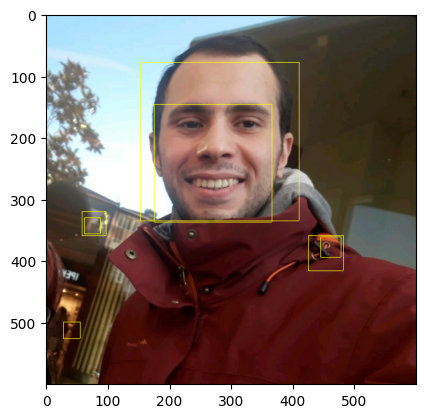

In [45]:
plt.imshow(plot(image, result))

In [46]:
stage = StageRNet()
model = stage.model

In [47]:
model.summary()

Model: "r_net_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 22, 22, 28)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu1 (PReLU)                  │ (None, 22, 22, 28)     │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling1 (MaxPooling2D)      │ (None, 11, 11, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 9, 9, 48)       │        12,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu2 (PReLU)                  │ (None, 9, 9, 48)       │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling2 (MaxPooling2D)      │ (None, 4, 4, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu3 (PReLU)                  │ (None, 3, 3, 64)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute (Permute)               │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten3 (Flatten)              │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc4 (Dense)                     │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu4 (PReLU)                  │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc5-1 (Dense)                   │ (None, 4)              │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc5-2 (Dense)                   │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,178 (391.32 KB)

 Trainable params: 100,178 (391.32 KB)

 Non-trainable params: 0 (0.00 B)

### ONet (Output Network)

* final network in the MTCNN pipeline
* refines the bounding boxes and detects five facial landmarks (eyes, nose, and mouth corners)
* produces three outputs:
  * Regression of the bounding box coordinates to fine-tune the proposals
  * Classification of the proposals into two categories: no-face or face.
  * Detection of five facial landmarks (eyes, nose, and mouth corners).

In [48]:
import sys
sys.path.insert(0, "..")

In [49]:
from mtcnn.stages import StageONet

In [50]:
image = load_image("batuhan.jpg")

In [52]:
mtcnn = MTCNN(stages=[StagePNet, StageRNet, StageONet], device="CPU:0")

In [53]:
%%time
result = mtcnn.detect_faces(image, postprocess=True, threshold_onet=0.85)

CPU times: user 441 ms, sys: 5.87 ms, total: 447 ms
Wall time: 345 ms


In [54]:
result

[{'box': [180, 79, 204, 262],
  'confidence': np.float64(1.0),
  'keypoints': {'nose': [np.int64(278), np.int64(223)],
   'mouth_right': [np.int64(325), np.int64(266)],
   'right_eye': [np.int64(325), np.int64(175)],
   'left_eye': [np.int64(233), np.int64(174)],
   'mouth_left': [np.int64(231), np.int64(266)]}}]

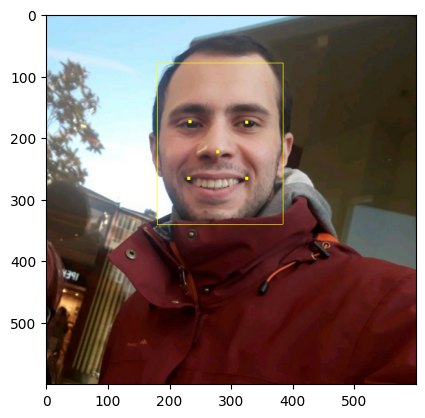

In [55]:
plt.imshow(plot(image, result))

In [56]:
stage = StageONet()
model = stage.model

In [59]:
model.summary()

Model: "o_net_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu1 (PReLU)                  │ (None, 46, 46, 32)     │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling1 (MaxPooling2D)      │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu2 (PReLU)                  │ (None, 21, 21, 64)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling2 (MaxPooling2D)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu3 (PReLU)                  │ (None, 8, 8, 64)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling3 (MaxPooling2D)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 3, 3, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu4 (PReLU)                  │ (None, 3, 3, 128)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute (Permute)               │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten4 (Flatten)              │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc5 (Dense)                     │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu5 (PReLU)                  │ (None, 256)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6-1 (Dense)                   │ (None, 4)              │         1,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6-2 (Dense)                   │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6-3 (Dense)                   │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,040 (1.48 MB)

 Trainable params: 389,040 (1.48 MB)

 Non-trainable params: 0 (0.00 B)